<a href="https://colab.research.google.com/github/SharonCamacho/Clase_Curso_Cisco/blob/master/Fruits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                 Ejercicio de clasificación multiclase
Adaptado de: https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2

## Carga del dataset

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
fruits = pd.read_csv('dataset_fruits.txt')
fruits.head()

FileNotFoundError: ignored

## 1. Cuantas filas y columnas tiene el dataset?

In [0]:
# Your code here


La respuesta al anterior debe ser: (59,7)

## 2. Cuales clases únicas de furit_name tiene el dataset?

In [0]:
# Your code here


La respuesta al anterior debe ser: ['apple' 'mandarin' 'orange' 'lemon']

## 3. Cuantas frutas tiene de cada case?

In [0]:
# Your code here


La respuesta al anterior debe ser:
fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64

## Gráfica de cantidades de frutas

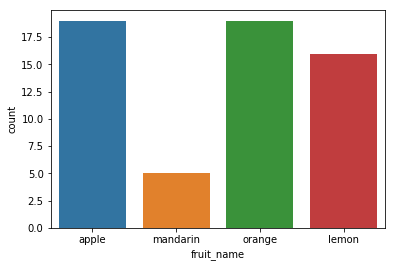

In [0]:
import seaborn as sns
sns.countplot(fruits['fruit_name'],label="Count")
plt.show()

## Descripción estadística de los datos

In [0]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


## Preparación de los datos

In [0]:
# Definición de datos X y y
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']

In [0]:
# Separación en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [0]:
# Escalado (normalizado) de los datos
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### 4. Cree un modelo llamado logreg que utilice regresion logística para hacer la clasificación, entrénelo con X_train y y_train

In [0]:
# Your code here


In [0]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

El resultado anterior debe ser

Accuracy of Logistic regression classifier on training set: 0.70

Accuracy of Logistic regression classifier on test set: 0.58

### 5. Cree un modelo llamado clf que utilice arboles de decision para hacer la clasificación, enténelo con X_train y y_train

In [0]:
# Your code here



In [0]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

El resultado anteior debe ser:

Accuracy of Decision Tree classifier on training set: 1.00

Accuracy of Decision Tree classifier on test set: 0.92

### 6. Cree un modelo llamado knn que utilice KNN y 2 vecinos para hacer la clasificación, entrénelo con x_train y y_train

In [0]:
# Your code here



In [0]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

El resultado anterior debe ser:

Accuracy of K-NN classifier on training set: 0.98

Accuracy of K-NN classifier on test set: 0.92

### 7. Cree un modelo llamado svm que utilice SVM para hacer la clasificación, entrénelo con x_train y y_train

In [0]:
# Your code here



In [0]:
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

El resultado anterior debe ser: 
    
Accuracy of SVM classifier on training set: 0.57
    
Accuracy of SVM classifier on test set: 0.42

## Matriz de cunfusión y métricas de KNN

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4 0 0 0]
 [0 1 0 0]
 [1 0 4 0]
 [0 0 0 2]]
              precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         1
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         2

   micro avg       0.92      0.92      0.92        12
   macro avg       0.95      0.95      0.94        12
weighted avg       0.93      0.92      0.92        12



## Gráfica de Clasificación del KNN

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


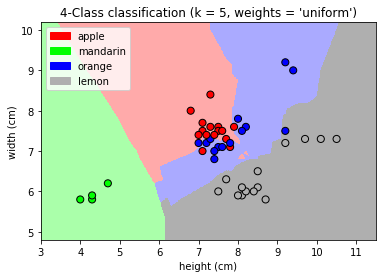

In [0]:
import matplotlib.cm as cm
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].as_matrix()
    y_mat = y.as_matrix()
# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("4-Class classification (k = %i, weights = '%s')"
           % (n_neighbors, weights))    
    plt.show()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
plot_fruit_knn(X_train, y_train, 5, 'uniform')

## Análisis del número de vecinos

([<matplotlib.axis.XTick at 0x18bc338e940>,
 <a list of 5 Text xticklabel objects>)

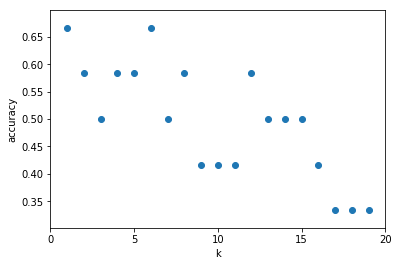

In [0]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])